In [9]:
from readtcfiles import readRAWFile, readRSTFile
import matplotlib.pyplot as plt
import numpy as np
import os.path

# TotalChrom File Report 

Input the file name of the result file you wish to read below. The code will take care of the rest!

In [10]:
#filename = "/users/stephen-hill9/documents/NAP EX 081 1-12-17_061.rst"
filename = "/users/stephen-hill9/documents/nap ex 3-1 0800 8-9-17_004.rst"
print(filename)

/users/stephen-hill9/documents/nap ex 3-1 0800 8-9-17_004.rst


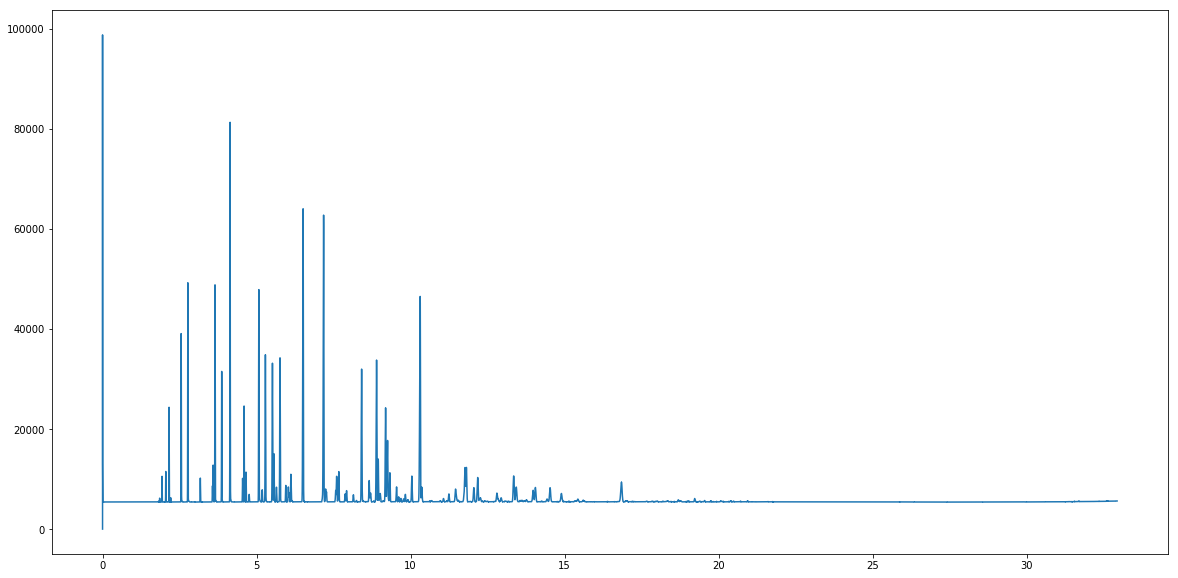

In [16]:
rstDataFileDictionary = {}
rawDataFileDictionary = {}

with open(filename, "rb") as rst_file:
    rstDataFileDictionary = readRSTFile(rst_file)
    rst_file.close()

rawfilename = rstDataFileDictionary["resultheader"]["rawfilename"]
rawfilename = rawfilename[rawfilename.rfind("\\"):]
lastslashindex = filename.rfind("/")
directory = filename[:lastslashindex]

rawfilepath = directory + rawfilename
rawfilepath = rawfilepath.replace("\\", "/")
timearray = []
if os.path.isfile(rawfilepath):
    with open(rawfilepath, "rb") as raw_file:
        rawDataFileDictionary = readRAWFile(raw_file)
        raw_file.close()
    
    increment = rstDataFileDictionary["adheader"]["runtime"]/rstDataFileDictionary["adheader"]["numberdatapoints"]
    for counter in range(rstDataFileDictionary["adheader"]["numberdatapoints"]):
        timearray.append(counter*increment)
    plt.subplots(figsize=(20,10))
    plt.plot(timearray, rawDataFileDictionary["datapoints"])
    
    plt.show()


In [12]:
numberOfPeaks = rstDataFileDictionary["numberofpeaks"]
for counter in range(numberOfPeaks):
    thisPeakDescriptor = rstDataFileDictionary["peakdescriptors"][counter]
    spaces = ""
    morespaces = ""
    increment = rstDataFileDictionary["adheader"]["runtime"]/rstDataFileDictionary["adheader"]["numberdatapoints"]
    rettime = round(thisPeakDescriptor["middleindex"] * increment, 2)
    percentarea = round(100 * (thisPeakDescriptor["area"] / rstDataFileDictionary["resultheader"]["totalpeakarea"]), 2)
    for spacecounter in range(50 - len(thisPeakDescriptor["name"])):
        spaces = spaces + " "
    for spacecounter in range(15 - len(str(thisPeakDescriptor["area"]))):
        morespaces = morespaces + " "
    print(str(counter+1) + "\t" + str(rettime) + "\t" + thisPeakDescriptor["name"] + spaces + str(thisPeakDescriptor["area"]) + morespaces + str(percentarea))

1	1.82	methane                                           97.25          0.01
2	1.85	ethane                                            426.5          0.04
3	1.93	propane                                           2755.6         0.28
4	2.05	2-methylpropane                                   3390.25        0.34
5	2.16	butane                                            10906.6        1.09
6	2.21	2,2-dimethylpropane                               501.6          0.05
7	2.55	2-methylbutane                                    22715.8        2.28
8	2.77	pentane                                           31352.9        3.14
9	2.98	                                                  39.25          0.0
10	3.17	2,2-dimethylbutane                                3970.5         0.4
11	3.57	cyclopentane                                      2477.16        0.25
12	3.59	2,3-dimethylbutane                                5999.64        0.6
13	3.65	2-methylpentane                                   34154.5        3.4